In [1]:
# reloads modules when they are edited
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
# using a smaller dataset
X = mnist_data['data'][:7000]
y = mnist_data['target'][:7000]

print(X.shape)
print(y.shape)

(7000, 784)
(7000,)


In [4]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


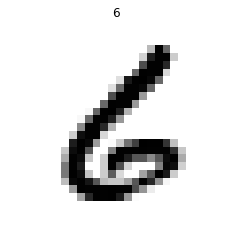

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

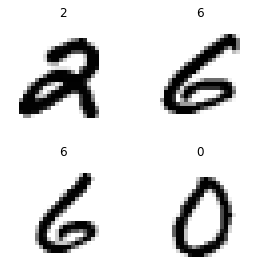

In [6]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [7]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [8]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [12]:
from models import Sequential
from layers import Linear, ReLU, Softmax
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy
from optimizers import SGD

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

# using SGD with no momentum
model.configure(loss=CategoricalCrossentropy(),
                optimizer=SGD(learning_rate=0.01),
                metrics={"acc": categorical_accuracy})

# train the model
sgd_history = model.train(X_train_normalized, y_train_one_hot,
                          X_test_normalized, y_test_one_hot, epochs=100)

Epoch 01	loss=1.083168	val_loss=1.117989	acc=0.753333	val_acc=0.720000
Epoch 02	loss=0.622641	val_loss=0.661614	acc=0.841500	val_acc=0.821000
Epoch 03	loss=0.477272	val_loss=0.516968	acc=0.874833	val_acc=0.857000
Epoch 04	loss=0.406746	val_loss=0.447298	acc=0.892000	val_acc=0.880000
Epoch 05	loss=0.361376	val_loss=0.397525	acc=0.901167	val_acc=0.899000
Epoch 06	loss=0.334079	val_loss=0.381198	acc=0.908333	val_acc=0.890000
Epoch 07	loss=0.306388	val_loss=0.354306	acc=0.915833	val_acc=0.902000
Epoch 08	loss=0.292838	val_loss=0.339770	acc=0.918000	val_acc=0.911000
Epoch 09	loss=0.271211	val_loss=0.322194	acc=0.926333	val_acc=0.910000
Epoch 10	loss=0.259188	val_loss=0.317080	acc=0.927333	val_acc=0.916000
Epoch 11	loss=0.246575	val_loss=0.309081	acc=0.931667	val_acc=0.921000
Epoch 12	loss=0.232455	val_loss=0.295706	acc=0.937833	val_acc=0.929000
Epoch 13	loss=0.223390	val_loss=0.286636	acc=0.940500	val_acc=0.927000
Epoch 14	loss=0.214267	val_loss=0.284678	acc=0.941833	val_acc=0.934000
Epoch 

In [13]:
# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

# using SGD with momentum
model.configure(loss=CategoricalCrossentropy(),
                optimizer=SGD(learning_rate=0.01, momentum_beta=0.9),
                metrics={"acc": categorical_accuracy})

# train the model
sgd_momentum_history = model.train(X_train_normalized, y_train_one_hot,
                                   X_test_normalized, y_test_one_hot, epochs=100);

Epoch 01	loss=1.106147	val_loss=1.134875	acc=0.733000	val_acc=0.717000
Epoch 02	loss=0.617221	val_loss=0.646074	acc=0.851500	val_acc=0.822000
Epoch 03	loss=0.466140	val_loss=0.496582	acc=0.886667	val_acc=0.864000
Epoch 04	loss=0.385083	val_loss=0.419713	acc=0.902500	val_acc=0.884000
Epoch 05	loss=0.344501	val_loss=0.382888	acc=0.908333	val_acc=0.885000
Epoch 06	loss=0.310626	val_loss=0.344651	acc=0.918000	val_acc=0.905000
Epoch 07	loss=0.288860	val_loss=0.329325	acc=0.925000	val_acc=0.911000
Epoch 08	loss=0.269300	val_loss=0.313133	acc=0.931000	val_acc=0.914000
Epoch 09	loss=0.260903	val_loss=0.312752	acc=0.928333	val_acc=0.905000
Epoch 10	loss=0.243508	val_loss=0.290888	acc=0.936500	val_acc=0.921000
Epoch 11	loss=0.229030	val_loss=0.278381	acc=0.938333	val_acc=0.922000
Epoch 12	loss=0.222029	val_loss=0.280481	acc=0.938500	val_acc=0.925000
Epoch 13	loss=0.208872	val_loss=0.265345	acc=0.943333	val_acc=0.924000
Epoch 14	loss=0.201257	val_loss=0.266592	acc=0.946167	val_acc=0.930000
Epoch 

In [14]:
from optimizers import RMSprop

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

# using RMSprop
model.configure(loss=CategoricalCrossentropy(),
                optimizer=RMSprop(learning_rate=0.01, beta=0.9),
                metrics={"acc": categorical_accuracy})

# train the model
rmsprop_history = model.train(X_train_normalized, y_train_one_hot,
                              X_test_normalized, y_test_one_hot, epochs=100);

Epoch 01	loss=0.409266	val_loss=0.500540	acc=0.877167	val_acc=0.851000
Epoch 02	loss=0.147497	val_loss=0.265156	acc=0.957000	val_acc=0.932000
Epoch 03	loss=0.134304	val_loss=0.338997	acc=0.957500	val_acc=0.928000
Epoch 04	loss=0.119988	val_loss=0.365766	acc=0.966167	val_acc=0.923000
Epoch 05	loss=0.102635	val_loss=0.384792	acc=0.973167	val_acc=0.936000
Epoch 06	loss=0.119534	val_loss=0.459572	acc=0.974000	val_acc=0.934000
Epoch 07	loss=0.114614	val_loss=0.429563	acc=0.972833	val_acc=0.945000
Epoch 08	loss=0.077726	val_loss=0.377744	acc=0.981667	val_acc=0.955000
Epoch 09	loss=0.080354	val_loss=0.556629	acc=0.981667	val_acc=0.942000
Epoch 10	loss=0.053410	val_loss=0.514238	acc=0.987500	val_acc=0.940000
Epoch 11	loss=0.066627	val_loss=0.560694	acc=0.984167	val_acc=0.934000
Epoch 12	loss=0.069555	val_loss=0.572053	acc=0.987000	val_acc=0.938000
Epoch 13	loss=0.032279	val_loss=0.432352	acc=0.993167	val_acc=0.950000
Epoch 14	loss=0.067508	val_loss=0.537090	acc=0.987500	val_acc=0.945000
Epoch 

In [ ]:
from optimizers import Adam

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

# using RMSprop
model.configure(loss=CategoricalCrossentropy(),
                optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999),
                metrics={"acc": categorical_accuracy})

# train the model
adam_history = model.train(X_train_normalized, y_train_one_hot,
                           X_test_normalized, y_test_one_hot, epochs=100);

Epoch 01	loss=0.240071	val_loss=0.308364	acc=0.926500	val_acc=0.907000
Epoch 02	loss=0.119661	val_loss=0.265287	acc=0.962000	val_acc=0.924000
Epoch 03	loss=0.156332	val_loss=0.388536	acc=0.953833	val_acc=0.908000
Epoch 04	loss=0.111411	val_loss=0.279077	acc=0.967167	val_acc=0.920000
Epoch 05	loss=0.095727	val_loss=0.359227	acc=0.969167	val_acc=0.930000
Epoch 06	loss=0.099783	val_loss=0.339781	acc=0.965500	val_acc=0.922000
Epoch 07	loss=0.142573	val_loss=0.469895	acc=0.957833	val_acc=0.903000
Epoch 08	loss=0.092190	val_loss=0.345892	acc=0.970167	val_acc=0.923000
Epoch 09	loss=0.071402	val_loss=0.373629	acc=0.975167	val_acc=0.921000
Epoch 10	loss=0.016929	val_loss=0.308161	acc=0.994500	val_acc=0.943000
Epoch 11	loss=0.075977	val_loss=0.424683	acc=0.981667	val_acc=0.929000
Epoch 12	loss=0.194828	val_loss=0.601147	acc=0.957167	val_acc=0.915000
Epoch 13	loss=0.123476	val_loss=0.559542	acc=0.969500	val_acc=0.914000
Epoch 14	loss=0.119312	val_loss=0.437053	acc=0.970000	val_acc=0.917000
Epoch 

In [ ]:
epochs = np.arange(1, 101)
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(epochs, [e['loss'] for e in sgd_history], c='r', label='SGD')
plt.plot(epochs, [e['loss'] for e in sgd_momentum_history], c='g', label='SGD w/ Momentum')
plt.plot(epochs, [e['loss'] for e in rmsprop_history], c='b', label='RMSprop')
plt.plot(epochs, [e['loss'] for e in adam_history], c='k', label='Adam')
plt.legend()
plt.title("Comparing Optimization Algorithms")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show();